<h1>Amazon Alexa Review - Sentiment Analysis</h1>

Analyzing the Amazon Alexa dataset and building classification models to predict if the sentiment of a given input sentence is positive or negative.

**Importing necessary libraries:**

In [1]:
import numpy as np #This line imports the numpy library, which is used for working with arrays and doing math-related tasks.
import pandas as pd #This line imports the pandas library, which is used for handling and analyzing data in a table format, similar to Excel.
import matplotlib.pyplot as plt #This line imports matplotlib.pyplot, a tool for making plots and graphs.
import seaborn as sns # This line imports seaborn, a library for making prettier and more complex plots than matplotlib.
import nltk #This line imports the nltk library, which is used for working with human language data (like text).
from nltk.stem.porter import PorterStemmer # This imports a specific tool from nltk that helps simplify words to their base or root form (like changing "running" to "run").
nltk.download('stopwords') #This downloads a list of common words (like "and", "the", "is") that are often removed from text data because they don't carry much meaning.
from nltk.corpus import stopwords #This imports the list of stopwords from nltk.
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split #This imports a tool to split data into a training set and a test set for machine learning.
from sklearn.preprocessing import MinMaxScaler #This imports a tool to scale numerical data to a range between 0 and 1.
from sklearn.feature_extraction.text import CountVectorizer #This imports a tool to convert text data into numerical data by counting word occurrences.
from sklearn.model_selection import cross_val_score #This imports a tool to evaluate the performance of a model by splitting the data into multiple parts and testing on each part.
from sklearn.ensemble import RandomForestClassifier #This imports a machine learning model called Random Forest, which uses many decision trees to make predictions.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #This imports tools to evaluate and display how well a classification model is performing.
from sklearn.model_selection import GridSearchCV #This imports a tool to find the best parameters for a machine learning model by trying many different combinations.
from sklearn.model_selection import StratifiedKFold #This imports a tool for splitting data into parts in a way that keeps the same proportion of each class (category).
from sklearn.metrics import accuracy_score #This imports a tool to calculate the accuracy of a model, which is the percentage of correct predictions.
from wordcloud import WordCloud #This imports a tool to create word clouds, which are visual representations of text data where more frequent words appear larger.
from sklearn.tree import DecisionTreeClassifier #This imports a machine learning model called Decision Tree, which makes predictions by splitting data into branches based on features.
from xgboost import XGBClassifier #This imports a powerful machine learning model called XGBoost, which is very good for classification tasks.
import pickle #This imports the pickle library, which is used to save and load Python objects, like trained models.
import re #This imports the re library, which is used for working with regular expressions (patterns for matching text).


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91954\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Exploratiry Data Analysis**

In [2]:
#Load the data
data = pd.read_csv(r"Data\amazon_alexa.tsv", delimiter = '\t', quoting = 3)
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
#Column names
print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [5]:
#Check for null values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [6]:
#Getting the record where 'verified_reviews' is null 
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [7]:
#We will drop the null record
data.dropna(inplace=True)
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [8]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [9]:
#Randomly checking for 10th record

# This line prints the value in the verified_reviews column for the 11th row in the data dataframe.
# data.iloc[10] selects the 11th row of the dataframe (because indexing starts at 0).
# ['verified_reviews'] selects the value from the verified_reviews column of that row.
# The f at the beginning of the string allows us to insert this value directly into the printed message.

# iloc stands for "integer location." It is used to select rows and columns by their integer position (index) in the dataframe.
# data.iloc[10] means "select the 11th row of the dataframe."
# ['column_name'] is then used to select a specific column from that row.

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


In [10]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

1. rating, feedback and length are integer values
2. date, variation and verified_reviews are string values

<h2>Analyzing 'rating' column</h2>

This column refers to the rating of the variation given by the user

In [11]:
len(data)

3149

In [12]:
#Distinct values of 'rating' and its count  

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


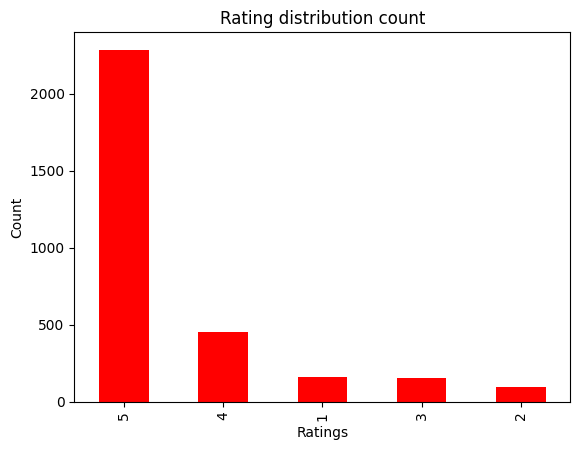

In [13]:
#Bar plot to visualize the total counts of each rating

data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [14]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


**Lets plot the above values in a pie chart**

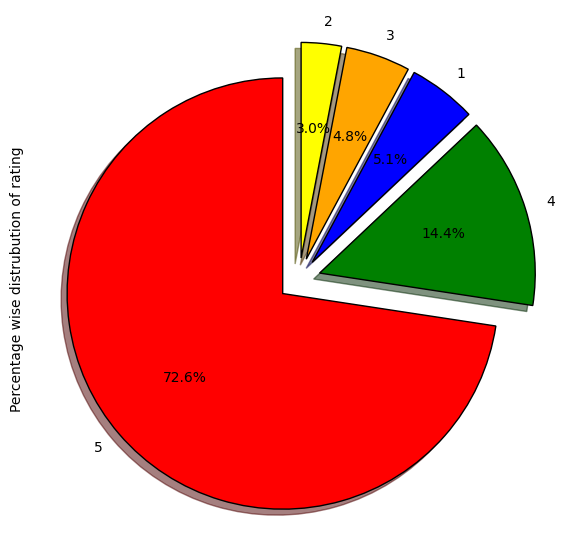

In [15]:
# Code to print a full fledged pie-chart

fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

**Analyzing 'feedback' column**

This column refers to the feedback of the verified review

In [16]:
#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.

In [17]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [18]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


**From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review**

Let's plot the feedback value count in a bar graph

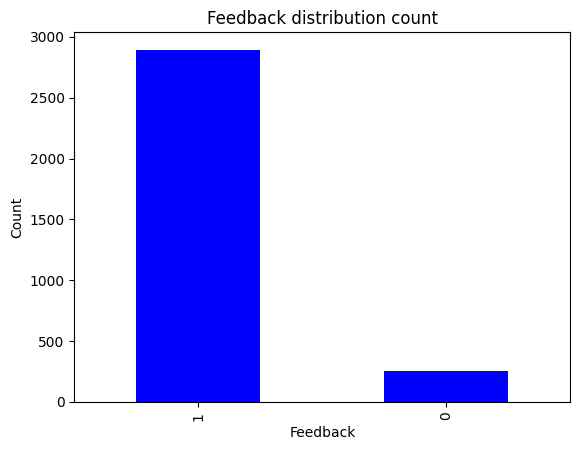

In [19]:
#Bar graph to visualize the total counts of each feedback

data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [20]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


Feedback distribution

91.87% reviews are positive <br>
8.13% reviews are negative

<Axes: ylabel='Percentage wise distrubution of feedback'>

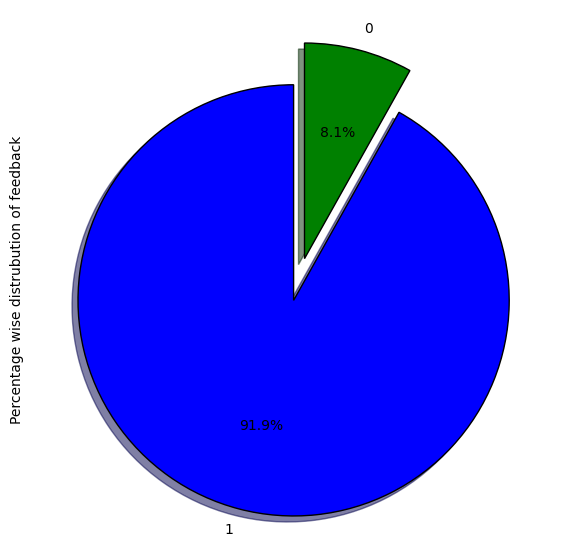

In [21]:
fig = plt.figure(figsize=(7,7))

colors = ('blue', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

Let's see the 'rating' values for different values of 'feedback'

In [22]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [23]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

**If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).**

Analyzing 'variation' column
This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [24]:
#Distinct values of 'variation' and its count 

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


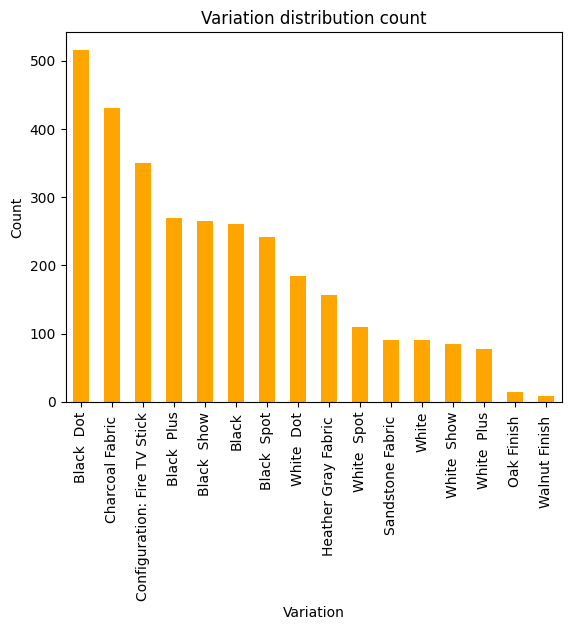

In [25]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [26]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


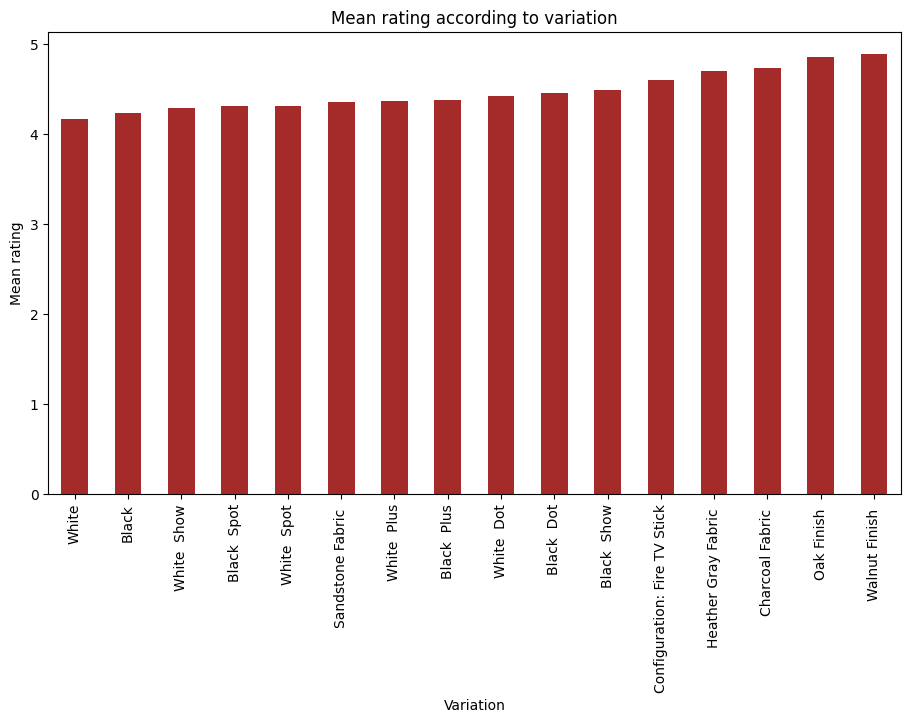

In [27]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

**Analyzing 'verified_reviews' column**

This column contains the textual review given by the user for a variation for the product.

In [28]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

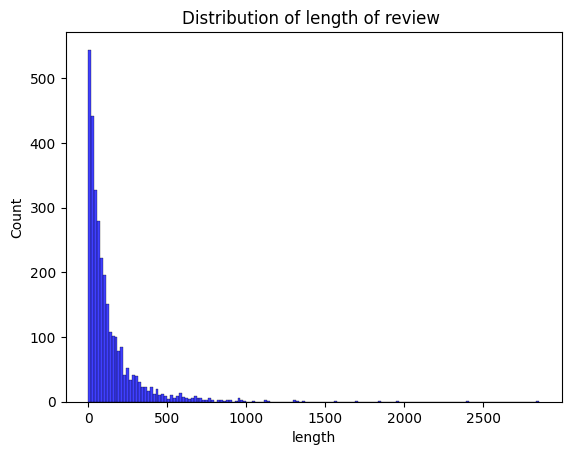

In [29]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

Length analysis when feedback is 0 (negative)

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

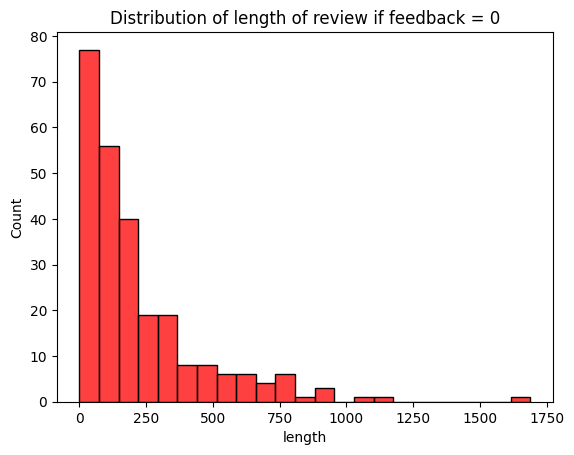

In [30]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

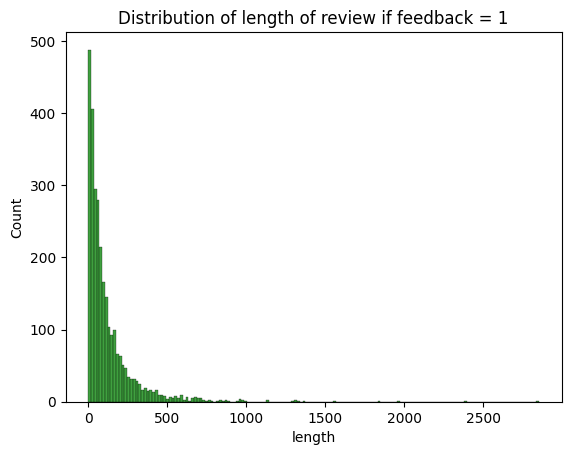

In [31]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

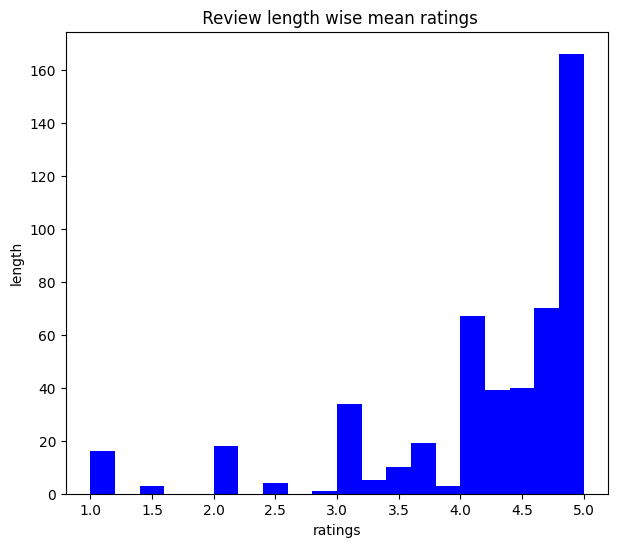

In [32]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [33]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

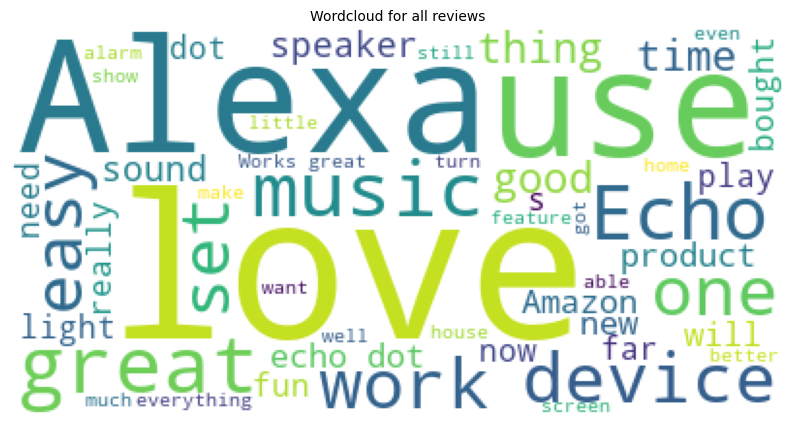

In [34]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

Lets find the unique words in each feedback category

In [35]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

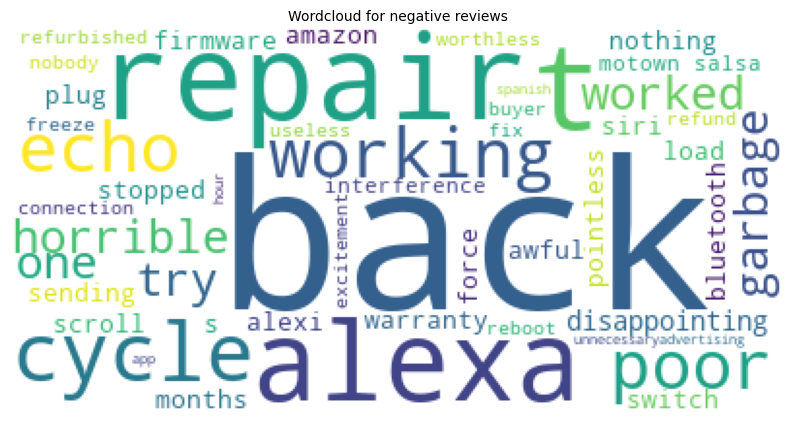

In [36]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

Negative words can be seen in the above word cloud - garbage, pointless, poor, horrible, repair etc

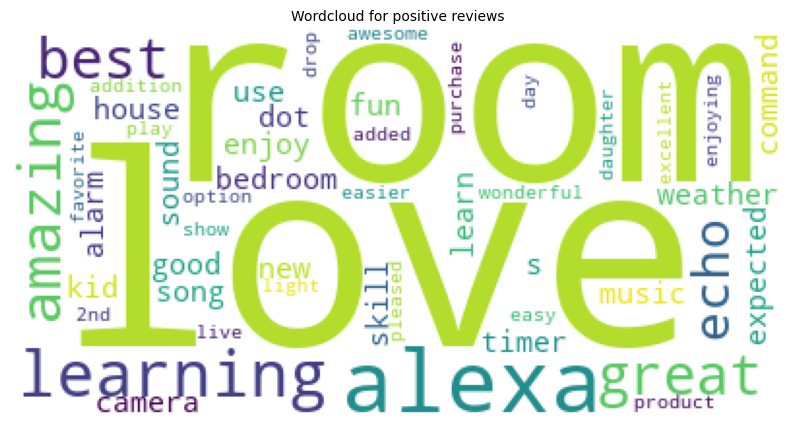

In [37]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

Positive words can be seen in the above word cloud - good, enjoying, amazing, best, great etc

<h1>Preprocessing and Modelling</h1>

To build the corpus from the 'verified_reviews' we perform the following -

1. Replace any non alphabet characters with a space <br>
2. Convert to lower case and split into words <br>
3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [38]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

Using Count Vectorizer to create **bag of words** in the above code snippet

X represents the features (inputs) of your data. Think of it as the information used to make predictions.<br>
y represents the labels (outputs) of your data. Think of it as the answers you want to predict.

In [39]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [40]:
# Ensure the directory exists
import os
os.makedirs('Models', exist_ok=True)

#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

Checking the shape of X and y

In [41]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


**Splitting data into train and test set with 30% data with testing.**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [43]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


Previous code was run to identify if standardization is needed. Looking at the max values its clear we do so. We'll scale X_train and X_test so that all values are between 0 and 1. It's useful to know these maximum values to ensure your data is within expected ranges and to identify any potential outliers.

In [44]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [45]:
#Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

<h1> RANDOM FORESTS </h1>

In [46]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [47]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.944973544973545


In [48]:
#Predicting on the test set
y_preds1 = model_rf.predict(X_test_scl)

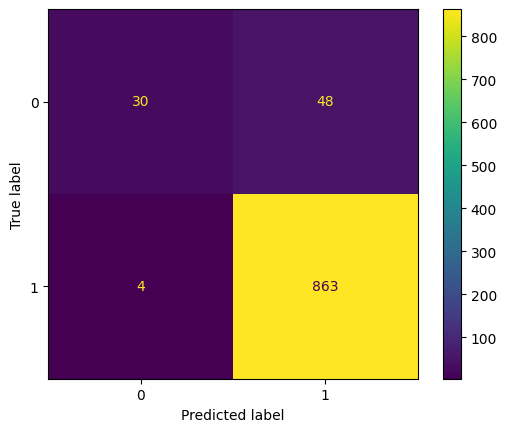

In [49]:
#Confusion Matrix
cm1 = confusion_matrix(y_test, y_preds1)
cm1_display = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model_rf.classes_)
cm1_display.plot()
plt.show()

**K-Fold Cross Validation**

In [50]:
# cross_val_score is a function that helps evaluate the performance of a machine learning model.
# estimator = model_rf specifies the model you are using, which in this case is model_rf (likely a Random Forest model).
# X = X_train_scl specifies the input features for the training data that have been scaled (X_train_scl).
# y = y_train specifies the target labels for the training data.
# cv = 10 specifies that you want to perform 10-fold cross-validation.
# Cross-validation means splitting your training data into 10 parts (folds). 
# The model is trained on 9 parts and tested on the remaining 1 part, and this process is repeated 10 times, 
# each time with a different part as the test set. 
# This helps to ensure that the model performs well on different subsets of the data.

accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

#This line prints the average accuracy, giving you an idea of how well your model performs on average across the different folds.
print("Accuracy :", accuracies.mean())

#This line prints the standard deviation, which tells you how much the accuracy scores vary from the average. 
# A smaller standard deviation means the model's performance is more consistent across different folds
print("Standard Variance :", accuracies.std())

Accuracy : 0.9333093377211025
Standard Variance : 0.006366523757451858


Applying grid search to get the optimal parameters on random forest

**HYPERPARAMETER TUNING**

In [51]:
# This dictionary, params, defines the different settings (hyperparameters) you want to try for your Random Forest model (model_rf).
# 'bootstrap': [True] means you want to use bootstrapping (sampling with replacement).
# 'max_depth': [80, 100] means you want to try tree depths of 80 and 100.
# 'min_samples_split': [8, 12] means you want to try splitting nodes if there are at least 8 or 12 samples.
# 'n_estimators': [100, 300] means you want to try using 100 and 300 trees in the forest.

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

# This creates a cross-validation object using Stratified K-Folds.
# n_splits = 2 means you will split your data into 2 parts (folds).
# Stratified means it ensures each fold has the same proportion of each class (label), making the evaluation fairer
cv_object = StratifiedKFold(n_splits = 2)

# GridSearchCV is a tool that tries different combinations of the hyperparameters defined in params to find the best ones for your model.
# estimator = model_rf specifies the model you are tuning (Random Forest in this case).
# param_grid = params specifies the hyperparameters to try.
# cv = cv_object specifies the cross-validation strategy to use.
# verbose = 0 means it won't print detailed information during the process (keeps it quiet).
# return_train_score = True means it will also return the scores on the training data for each combination of parameters.
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)

# X_train_scl is the scaled training features.
# y_train.ravel() is the training labels, flattened to a 1D array.
# The fit method will train the model with different combinations of hyperparameters and evaluate them using cross-validation to find the best combination.
grid_search.fit(X_train_scl, y_train.ravel())

C:\Users\91954\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

**To Enable Better Understanding**

**Real-World Example**:

Imagine you're a baker trying to find the best recipe for cookies. You have several variables you can tweak, like the baking time and the amount of sugar and flour. You want to test different combinations to see which makes the best cookies.

**Define Parameters**:

You decide to try baking times of 10 and 12 minutes (max_depth).<br>
You try using 1 and 2 cups of sugar (min_samples_split).<br>
You also test using 100g and 200g of flour (n_estimators).<br>

**Set Up Cross-Validation:**<br>
To be thorough, you decide to test each combination twice (n_splits = 2).

**Set Up Grid Search:**<br>
You use a grid search method to systematically try all the different combinations of your parameters.

**Run the Tests:**<br>
You bake cookies with each combination and taste them to see which combination is the best.

**Summary:**<br>
The params dictionary defines different combinations of hyperparameters to try for the model.<br>
StratifiedKFold sets up cross-validation to ensure each fold has the same proportion of classes.<br>
GridSearchCV tests all combinations of the hyperparameters using cross-validation to find the best one.<br>
fit method runs this process on the training data to find the best set of parameters for your model.

In [52]:
#Getting the best parameters from the grid search
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


This means that after running the grid search with cross-validation, the tool determined that the best set of parameters for your Random Forest model are:

**bootstrap: True**<br>

Bootstrapping means that the model will use sampling with replacement when creating the individual trees in the forest. This helps to ensure that each tree is built on a slightly different subset of the data, which can improve the overall performance of the model.<br>

**max_depth: 100**<br>

The maximum depth of each tree in the forest is 100. This means each tree can have up to 100 levels or layers of decisions. A deeper tree can capture more complex patterns in the data but can also risk overfitting.<br>

**min_samples_split: 12**<br>

A node (decision point) in a tree will only be split into further branches if there are at least 12 samples (data points) in that node. This parameter helps to prevent the tree from becoming too complex and helps in reducing overfitting.<br>

**n_estimators: 300**<br>

The number of trees in the forest is 300. Having more trees can improve the model’s performance by averaging out the predictions of many trees, but it also increases the computational cost.<br>

In [53]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds1))

Cross validation mean accuracy on train set : 96.744555353902
Cross validation mean accuracy on test set : 92.16197822141561
Accuracy score for test set : 0.944973544973545


<h1>XGBoost</h1>

In [54]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [55]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9718693284936479
Testing Accuracy : 0.9375661375661376


In [56]:
y_preds2 = model_xgb.predict(X_test)

In [58]:
#Confusion Matrix
cm2 = confusion_matrix(y_test, y_preds2)
print(cm2)

[[ 35  43]
 [ 18 849]]


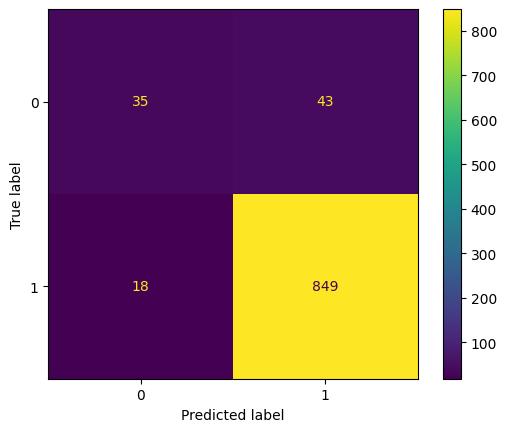

In [59]:
cm2_display = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model_xgb.classes_)
cm2_display.plot()
plt.show()

In [60]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

<h1>Decision Tree Classifier</h1>

In [61]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [62]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.9216931216931217


In [63]:
y_preds3 = model_dt.predict(X_test)

In [64]:
#Confusion Matrix
cm3 = confusion_matrix(y_test, y_preds3)
print(cm3)

[[ 41  37]
 [ 72 795]]


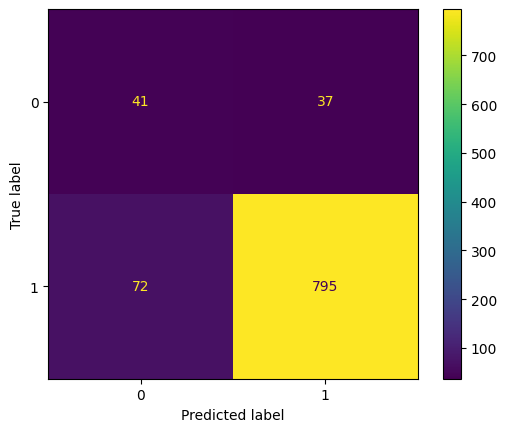

In [65]:
cm3_display = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=model_dt.classes_)
cm3_display.plot()
plt.show()

In [66]:
#Saving the DecisionTree classifier
pickle.dump(model_dt, open('Models/model_dt.pkl', 'wb'))